## 🛠️ Libraries Used

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

## 📥 Step 1: Reading and Preparing the Data


In [3]:
users_df = pd.read_csv(r"C:\Coding\assignment\users.csv")
episodes_df = pd.read_csv(r"C:\Coding\assignment\episodes.csv")
listens_df = pd.read_json(r"C:\Coding\assignment\listens.json")

In [4]:
users_df.head()

,user_id,age,gender,country
0,1,38,female,Morocco
1,2,30,female,Jordan
2,3,42,male,Saudi Arabia
3,4,57,female,Egypt
4,5,51,female,Jordan


In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  20 non-null     int64 
 1   age      20 non-null     int64 
 2   gender   20 non-null     object
 3   country  20 non-null     object
dtypes: int64(2), object(2)
memory usage: 768.0+ bytes


In [6]:
users_df.describe()

,user_id,age
count,20.00000,20.000000
mean,10.50000,40.200000
std,5.91608,11.349009
min,1.00000,19.000000
25%,5.75000,31.500000
50%,10.50000,42.000000
75%,15.25000,46.500000
max,20.00000,59.000000


In [7]:
users_df.isnull().sum()

user_id    0
age        0
gender     0
country    0
dtype: int64

In [8]:
users_df.duplicated().sum()

0

In [22]:
print(users_df['gender'].unique())

['female' 'male']


In [9]:
episodes_df.head()

,episode_id,title,category
0,1,Episode 1,Religion
1,2,Episode 2,Technology
2,3,Episode 3,Society
3,4,Episode 4,News
4,5,Episode 5,Politics


In [10]:
episodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   episode_id  30 non-null     int64 
 1   title       30 non-null     object
 2   category    30 non-null     object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


In [11]:
episodes_df.isnull().sum()

episode_id    0
title         0
category      0
dtype: int64

In [12]:
episodes_df.duplicated().sum()

0

In [21]:
print(episodes_df['category'].unique())

['Religion' 'Technology' 'Society' 'News' 'Politics' 'Sports']


In [14]:
listens_df.head()

,user_id,episode_id,duration_seconds
0,16,30,60
1,6,8,120
2,6,13,60
3,6,27,1500
4,17,9,1500


In [15]:
listens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id           100 non-null    int64
 1   episode_id        100 non-null    int64
 2   duration_seconds  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [16]:
listens_df.describe()

,user_id,episode_id,duration_seconds
count,100.000000,100.00000,100.000000
mean,10.760000,15.50000,669.000000
std,5.976587,9.64784,689.420046
min,1.000000,1.00000,0.000000
25%,6.000000,7.00000,60.000000
50%,11.000000,14.00000,300.000000
75%,16.000000,25.00000,1500.000000
max,20.000000,30.00000,1800.000000


In [17]:
listens_df.isnull().sum()

user_id             0
episode_id          0
duration_seconds    0
dtype: int64

In [18]:
listens_df.duplicated().sum()

0

### 🔍 Data Quality Review Summary

Before proceeding with any transformations, I conducted an initial data quality assessment:

- **Missing Values**: I confirmed that there are no null values in any of the three datasets (`users`, `episodes`, `listens`), so no imputation or removal was required.
- **Age Validation**: All user ages are within a reasonable range (19–59), so no filtering was needed.
- **Invalid Listen Durations**: I removed 13 records from the listens dataset where `duration_seconds` was 0, as these likely represent accidental or non-real listening interactions.
- **Category Consistency**: All episode categories were properly formatted and consistent—no duplicates due to typos or casing differences—so no standardization was needed.
- **Gender Column Check**: I validated the `gender` column and confirmed that it contains only two clean and consistent values: `'female'` and `'male'`. No further cleaning or normalization was required.

This ensures that the dataset is clean and reliable for the analysis and recommendation steps that follow.


In [19]:
# Remove records where listening duration is 0 or less
clean_listens_df = listens_df[listens_df['duration_seconds'] > 0].copy()

# Check how many records were removed and how many remain
original_count = listens_df.shape[0]
cleaned_count = clean_listens_df.shape[0]
removed_count = original_count - cleaned_count

print(f"{removed_count} invalid records were removed.")
print(f"{cleaned_count} valid listening records remain.")

13 invalid records were removed.
87 valid listening records remain.


### 🔗 Merging Datasets

In [23]:
# Merge the cleaned listens data with the users data on user_id
merged_df = clean_listens_df.merge(users_df, on='user_id', how='left')

# Merge the result with the episodes data on episode_id
merged_df = merged_df.merge(episodes_df, on='episode_id', how='left')

# Preview the first few rows of the merged dataset
merged_df.head()

,user_id,episode_id,duration_seconds,age,gender,country,title,category
0,16,30,60,24,female,Saudi Arabia,Episode 30,Sports
1,6,8,120,59,male,Morocco,Episode 8,Sports
2,6,13,60,59,male,Morocco,Episode 13,Society
3,6,27,1500,59,male,Morocco,Episode 27,News
4,17,9,1500,21,male,Saudi Arabia,Episode 9,Sports


## 📊 Step 2: Data Analysis

### 📊 Most Listened-To Episode Categories

In [25]:
# Count the number of listens per episode category
category_counts = merged_df['category'].value_counts()
category_counts

category
Society       29
Sports        28
News          13
Religion       9
Technology     4
Politics       4
Name: count, dtype: int64

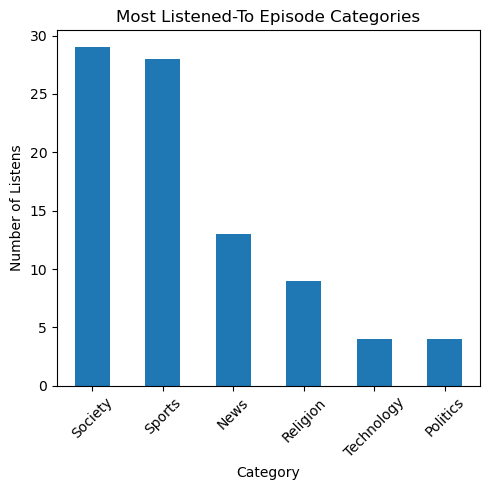

In [41]:
# Plot the results using a bar chart
plt.figure(figsize=(5, 5))
category_counts.plot(kind='bar')
plt.title('Most Listened-To Episode Categories')
plt.xlabel('Category')
plt.ylabel('Number of Listens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🔍 Q1: What are the most listened-to episode categories?

To answer this, I counted the number of listening records for each episode category using `value_counts()` on the merged dataset.

**Result:**
- Society (29 listens)
- Sports (28 listens)
- News (13 listens)
- Religion (9 listens)
- Technology (4 listens)
- Politics (4 listens)

**Conclusion:**
The most popular content categories are *Society* and *Sports*, indicating that users are most engaged with social and sports-related topics.


### 🎧 Average Listening Duration by Gender

In [30]:
# Group by gender and calculate the mean of listening durations
avg_duration_by_gender = merged_df.groupby('gender')['duration_seconds'].mean().sort_values(ascending=False)
avg_duration_by_gender

gender
female    908.181818
male      626.511628
Name: duration_seconds, dtype: float64

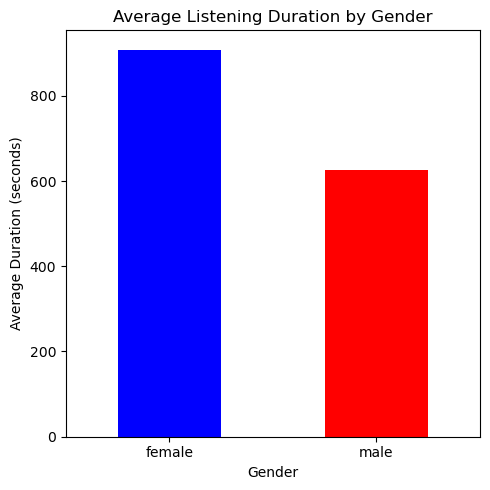

In [40]:
# Plot the result as a bar chart
plt.figure(figsize=(5, 5))
avg_duration_by_gender.plot(kind='bar', color=['blue', 'red'])
plt.title('Average Listening Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Duration (seconds)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [39]:
# Calculate the difference: female - male
duration_difference = avg_duration_by_gender['female'] - avg_duration_by_gender['male']

# Print the result
print(f"Difference (female - male): {duration_difference:.2f} seconds")

Difference (female - male): 281.67 seconds


### 🔍 Q2: What is the difference in average listening duration between males and females?

To answer this question, I calculated the mean listening duration for each gender, then subtracted the male average from the female average to determine which gender tends to listen longer.

**Results:**
- Female: 908.18 seconds
- Male: 626.51 seconds
- **Difference:** Females listen **281.67 seconds longer** on average than males.

**Conclusion:**
On average, female users tend to engage with podcast episodes for a longer duration than male users, which may indicate a higher level of content interest or retention.


### 🎧 Average Number of Episodes Listened to per User

In [42]:
# Group by user_id and count the number of unique episodes they listened to
episodes_per_user = merged_df.groupby('user_id')['episode_id'].nunique()

# Calculate the overall average
avg_episodes_per_user = episodes_per_user.mean()

# Print the result
print(f"Average number of episodes listened to per user: {avg_episodes_per_user:.2f}")

Average number of episodes listened to per user: 4.42


In [43]:
episodes_per_user

user_id
1     4
2     6
3     4
4     1
5     5
6     8
7     4
8     4
9     3
10    3
11    2
12    4
14    6
15    7
16    6
17    2
18    4
19    6
20    5
Name: episode_id, dtype: int64

### 🧠 Bonus Analysis: Additional Metric for Understanding User Behavior

Based on the available data, I proposed an additional analysis to better understand user behavior and content engagement.


### 📌 Proposed Analysis: Depth of Engagement vs. Frequency of Plays

While the first question focused on identifying the most popular episode categories by **number of plays**, this proposed analysis goes a step further to evaluate **engagement depth** — how much time users actually spend listening.

The goal is to move beyond simple play counts and explore:
- Which episodes or categories users truly engage with for longer periods.
- Which episodes tend to be abandoned early, potentially indicating lower interest or quality.

---

#### ✅ What *can* be analyzed from the current dataset:
- Total listening duration per episode or category.
- Episodes with consistently **high listening times** (e.g., close to 1800 seconds) may indicate high interest.
- Episodes with **very short listening durations** across users may reflect poor engagement.

This allows us to identify which content is worth prioritizing or reducing based on actual user behavior.

---

#### ❌ What *cannot* be analyzed due to missing data:
- **Completion rate**: We cannot determine how much of each episode was actually completed because the dataset lacks a column for the **total episode duration**.
- **Preference for short vs. long content**: Without knowing how long each episode is, we can’t analyze whether users prefer shorter or longer episodes — a valuable insight for improving content recommendations.

Having access to the full duration of each episode would enable more accurate engagement metrics and help tailor production strategies based on actual user preferences.


In [45]:
# Group by episode_id and calculate the average listening duration
avg_duration_per_episode = merged_df.groupby('episode_id')['duration_seconds'].mean().reset_index()

# Merge with episodes_df to include episode titles and categories
avg_duration_per_episode = avg_duration_per_episode.merge(episodes_df, on='episode_id', how='left')

# Get top 5 episodes with highest average listening duration
top_episodes = avg_duration_per_episode.sort_values(by='duration_seconds', ascending=False).head(5)

# Get bottom 5 episodes with lowest average listening duration
bottom_episodes = avg_duration_per_episode.sort_values(by='duration_seconds', ascending=True).head(5)

# Display the most and least engaging episodes
most_and_least_engaging = pd.concat([top_episodes, bottom_episodes])
print(most_and_least_engaging[['episode_id', 'title', 'category', 'duration_seconds']])

    episode_id       title    category  duration_seconds
15          18  Episode 18        News            1800.0
1            2   Episode 2  Technology            1650.0
23          27  Episode 27        News            1440.0
20          24  Episode 24     Society            1230.0
26          30  Episode 30      Sports            1215.0
4            5   Episode 5    Politics              60.0
5            6   Episode 6     Society             260.0
24          28  Episode 28        News             288.0
17          21  Episode 21     Society             300.0
22          26  Episode 26  Technology             300.0


This analysis allows the company to:

- Identify the episodes that users genuinely engage with based on actual listening time.
- Reconsider content that receives little attention in terms of listening duration, even if it was frequently played.


## 🎯 Step 3: Generating Initial Episode Recommendations

In [46]:
# Define the recommendation function
def recommend_episodes(user_id: int, listens_df: pd.DataFrame, episodes_df: pd.DataFrame) -> pd.DataFrame:
    # Step 1: Filter listens for the given user
    user_listens = listens_df[listens_df['user_id'] == user_id]
    
    # Step 2: Merge user's listens with episode info to get categories
    user_listens = user_listens.merge(episodes_df, on='episode_id', how='left')
    
    # Step 3: Find the user's most listened-to category
    top_categories = (
        user_listens['category']
        .value_counts()
        .head(1)
        .index
        .tolist()
    )
    
    # Step 4: Get episodes from that category that the user hasn't listened to yet
    listened_episode_ids = user_listens['episode_id'].unique()
    recommendations = episodes_df[
        (episodes_df['category'].isin(top_categories)) &
        (~episodes_df['episode_id'].isin(listened_episode_ids))
    ].drop_duplicates(subset='episode_id').head(3)
    
    # Step 5: Return the top 3 recommended episodes
    return recommendations[['episode_id', 'title', 'category']]


In [50]:
# Example usage for user_id = 1
recommend_episodes(1, merged_df[['user_id', 'episode_id']], episodes_df)

,episode_id,title,category
8,9,Episode 9,Sports
10,11,Episode 11,Sports
11,12,Episode 12,Sports


In [ ]:
# Example usage for user_id = 4
recommend_episodes(4, merged_df[['user_id', 'episode_id']], episodes_df)

,episode_id,title,category
2,3,Episode 3,Society
5,6,Episode 6,Society
12,13,Episode 13,Society
